In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
P=50 #poplulation
N=0.8# cross over probability
M=0.20 # muation probability 
pre_best=1
i=0
child =[]
np.set_printoptions(suppress=True)

# Intialization

In [3]:
A= np.random.rand(1,50)*360
A=A.astype(int)
A


array([[168, 245, 220, 249, 173,  75, 127, 259, 259,  54,  29, 169, 339,
        347, 266, 199, 323, 144,  59, 257, 126,  99, 152, 303, 184, 343,
        190, 233, 206, 238, 312,  81,  82, 179, 186, 213,  34, 242,  48,
        154, 190,  57, 351, 167, 189,  20, 100, 281, 257, 301]])

In [4]:
#np.sin(A).tolist()[0] list 
my_list=list(zip(A.tolist()[0],np.sin(A*2*np.pi/360).tolist()[0]))
my_list[0:3]

[(168, 0.20791169081775931),
 (245, -0.9063077870366497),
 (220, -0.6427876096865393)]

In [5]:
def plot(A):
    global i
    i=i+1
    y=np.linspace(0,2*np.pi)
    plt.plot(y,np.sin(y))
    plt.xlabel('Genratioin {}'.format(i))
    plt.scatter((A*2*np.pi/360).tolist()[0],np.sin(A*2*np.pi/360).tolist()[0])


# Tornarment_selection

In [6]:
def tornarment_selection(A):
    # select two chromosomes
    p=[]

    for i in range(np.int(N*P)):
        # convert to int 
        temp=(np.random.rand(1,2)*49).astype(int)
        # selected value
        temp.tolist()[0]
        if(np.sin(A[0,temp.tolist()[0][0]]*2*np.pi/360)<np.sin(A[0,temp.tolist()[0][1]]*2*np.pi/360)):
            p.append(A[0,temp.tolist()[0][0]])
        else:
            p.append(A[0,temp.tolist()[0][1]])
   # p=[my_list[key] for key in p]
    return p

#  cross_over

In [7]:
def cross_over(A):
    c=[]
    v=[]
    for i in range(np.int(len(p)/2)):
        p1=A[:,i*2]
        p2=A[:,i*2+1]
        r = (np.random.rand(1)*9).astype(int)[0]
        # dec to binary
        p1b=bin(p1[0])[2:]
        p2b=bin(p2[0])[2:]
        # make 10 bit size
        while len(p1b)<10:
            p1b='0'+p1b
        while len(p2b)<10:
            p2b='0'+p2b
        
        c1b=p1b[:r+1]+p2b[r+1:]
        c2b=p2b[:r+1]+p1b[r+1:]
        #np.int(p1b)
        #print('{},{},{}'.format(r,p1b,p2b))
        # binary to dec
        c1=int(c1b,2)
        c2=int(c2b,2)
        c.append(c1)
        c.append(c2)
        #v1=np.float(c1)*2*np.pi/360
        #v2=np.float(c1)*2*np.pi/360
        v.append(np.sin((c1*2*np.pi/360)))
        v.append(np.sin(c2*2*np.pi/360))

    child=list(zip(c,v))
    return child
    

# mutation

In [8]:
def mutation(child):
    for i in range(int(M*P)):
        r=(np.random.rand(1)*N*P).astype(int)[0]
        k=(np.random.rand(1)*9).astype(int)[0]
        pb=bin(p[r])[2:]
        # make 10 bit size
        while len(pb)<10:
            pb='0'+pb
        if pb[k]=='0':
            pb=pb[:k]+pb[k].replace('0','1')+pb[k+1:]
        else:
            pb=pb[:k]+pb[k].replace('0','1')+pb[k+1:]
        child[r]=list(child[r])
        child[r][0]=int(pb,2)
        child[r][1]=np.sin(child[r][0]*2*np.pi/360)
    
    

# minimization

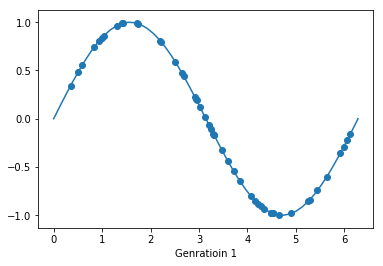

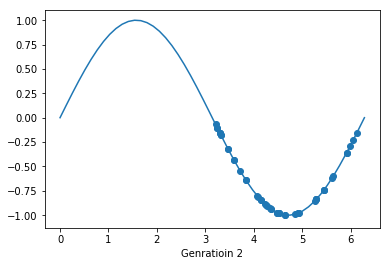

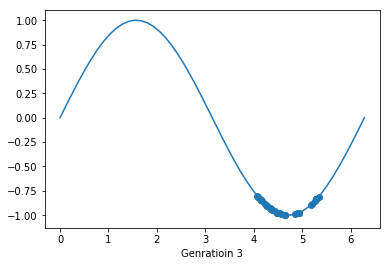

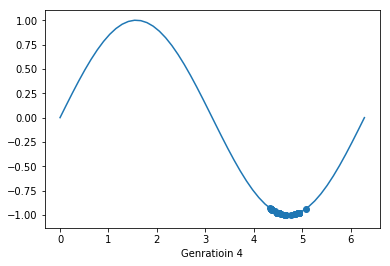

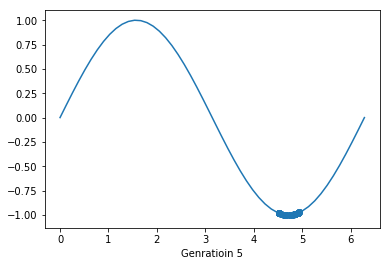

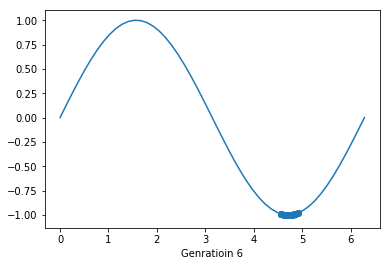

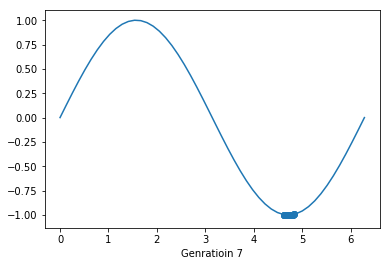

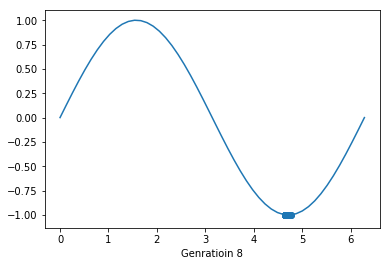

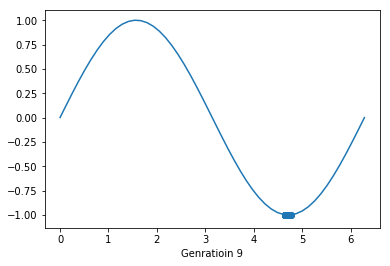

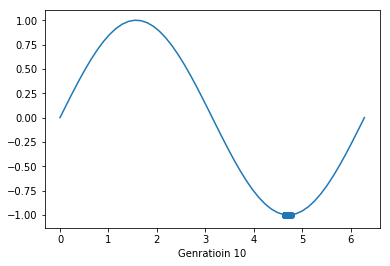

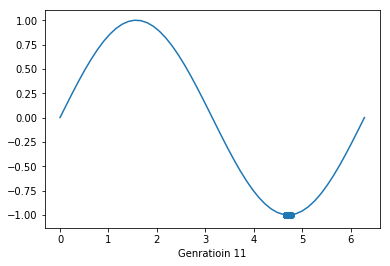

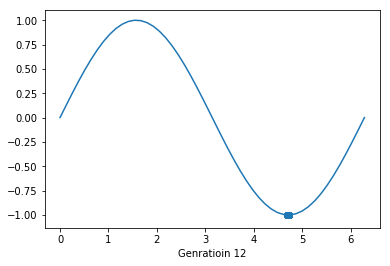

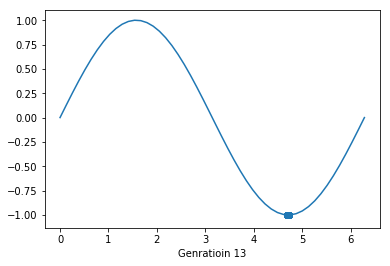

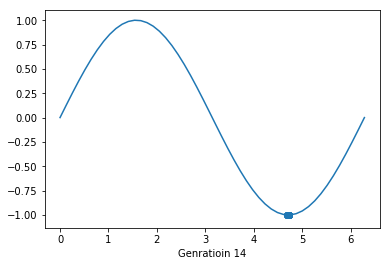

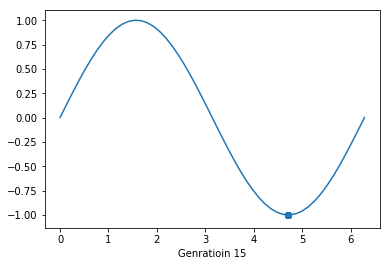

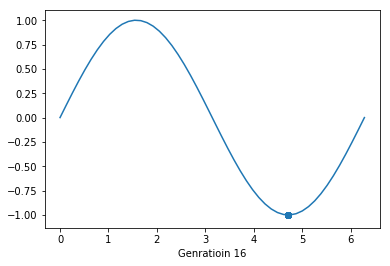

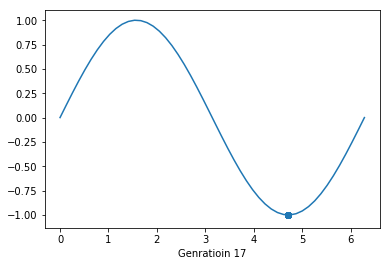

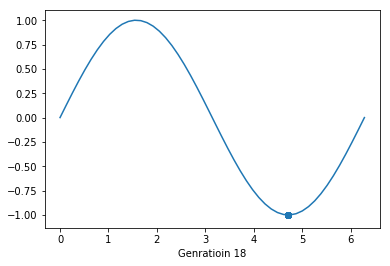

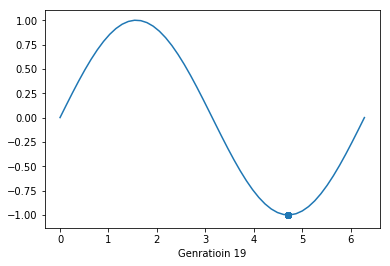

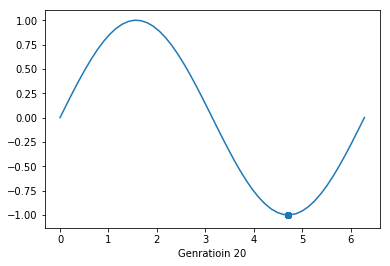

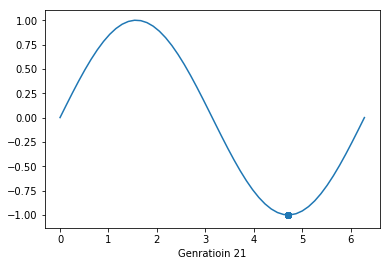

In [9]:

while 1:
    
    
    
    plot(A)
   # plt.savefig('min'+str(i)+'.png')
    global pre_best
    p=tornarment_selection(A)
    child=cross_over(A)
    
    type(child)
    mutation(child)
    my_list=my_list+child
    #sort by value
    my_list.sort(key = lambda t: t[1])

    my_list=my_list[:50]
    A=[my_list[i][0] for i in np.linspace(0,49,dtype=int)]
    A=np.array(A)
    A=A.reshape(1,50)
    
    best =my_list[0][1]
    if  math.fabs(best-pre_best)<0.00000000000000000000001 and  i>20:
        break;
    else:
   
        pre_best=best
    # Wait for 2 seconds
    plt.show()
    
    
    
 






# maximization

In [10]:
pre_best=0
A= np.random.rand(1,50)*360
A=A.astype(int)
A
#np.sin(A).tolist()[0] list 
my_list=list(zip(A.tolist()[0],np.sin(A*2*np.pi/360).tolist()[0]))
i=0

In [11]:
def tornarment_selection(A):
    # select two chromosomes
    p=[]

    for i in range(np.int(N*P)):
        # convert to int 
        temp=(np.random.rand(1,2)*49).astype(int)
        # selected value
        temp.tolist()[0]
        if(np.sin(A[0,temp.tolist()[0][0]]*2*np.pi/360)>np.sin(A[0,temp.tolist()[0][1]]*2*np.pi/360)):
            p.append(A[0,temp.tolist()[0][0]])
        else:
            p.append(A[0,temp.tolist()[0][1]])
   # p=[my_list[key] for key in p]
    return p

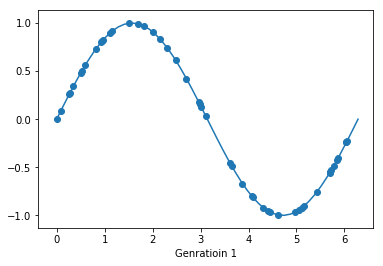

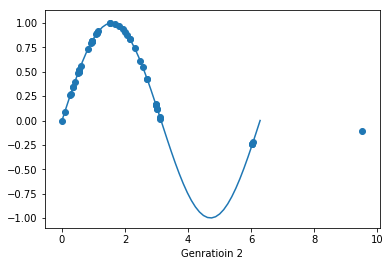

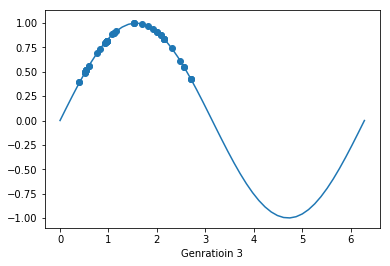

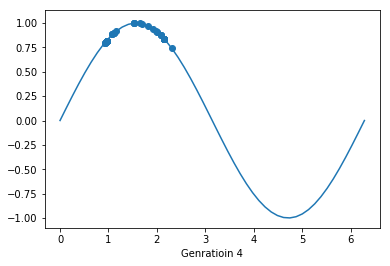

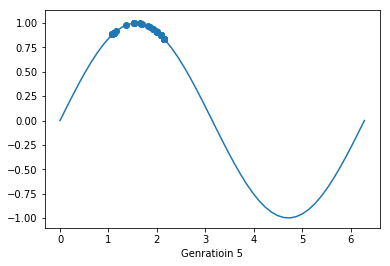

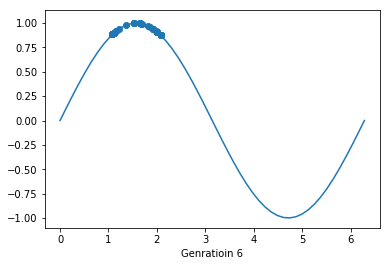

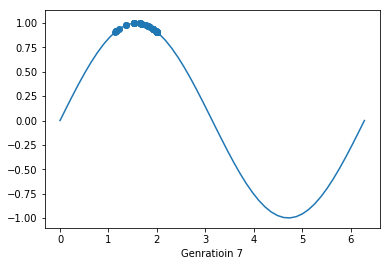

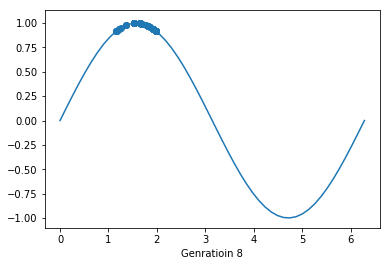

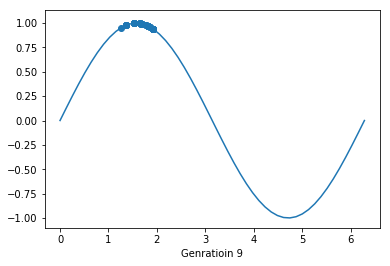

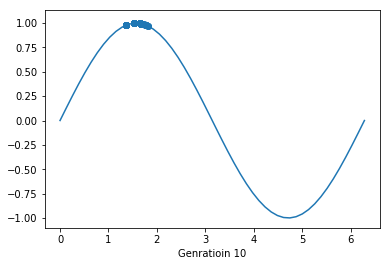

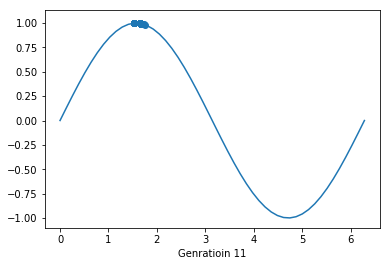

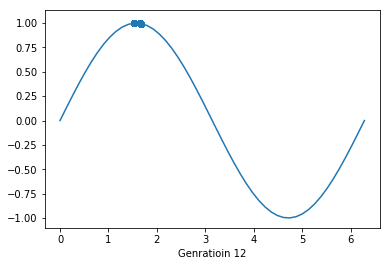

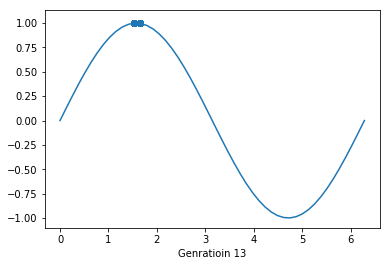

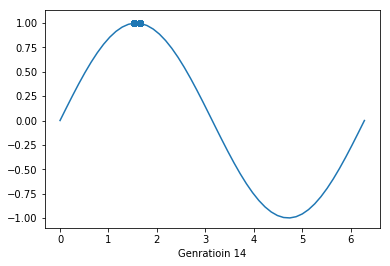

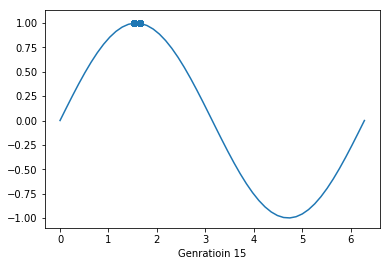

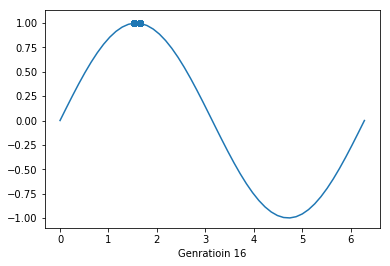

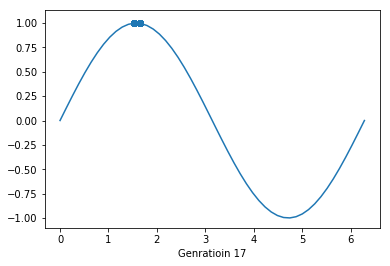

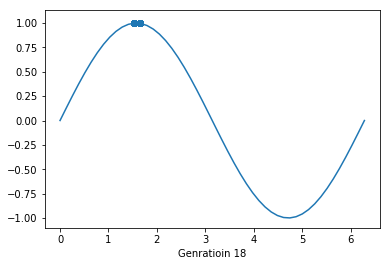

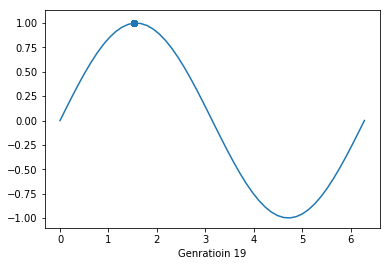

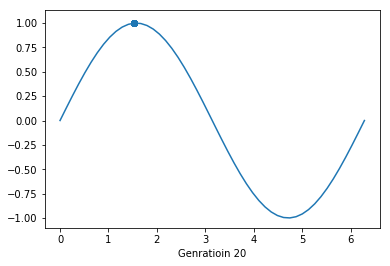

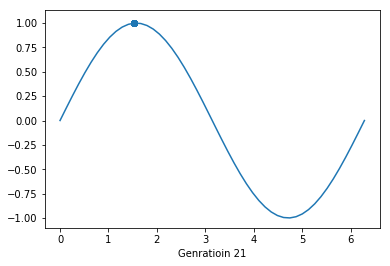

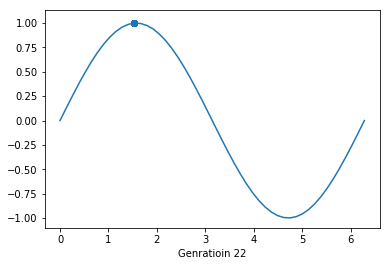

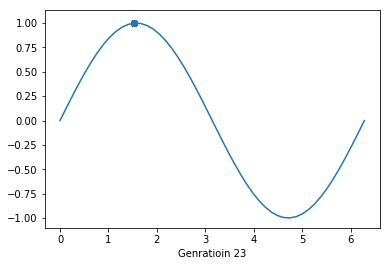

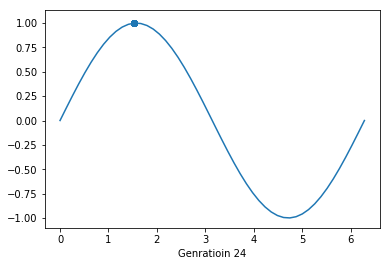

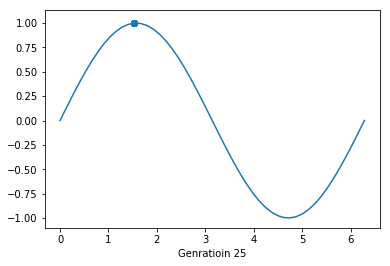

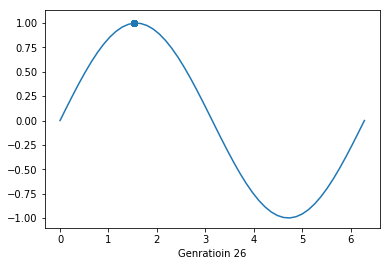

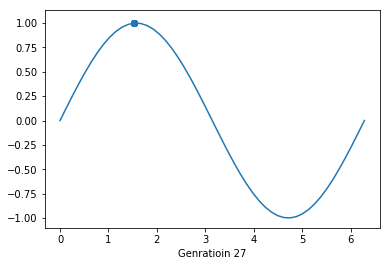

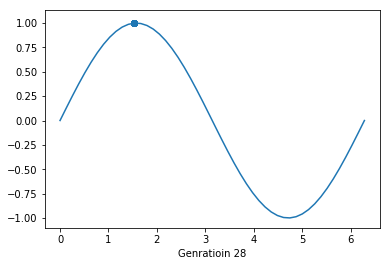

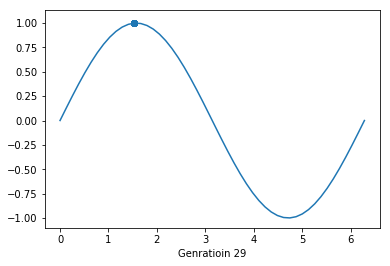

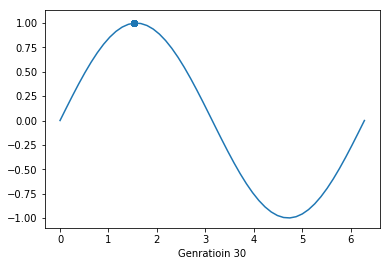

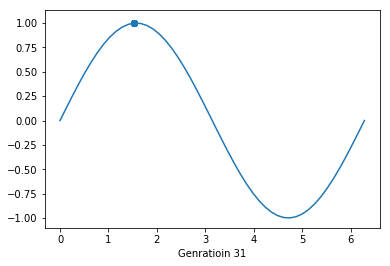

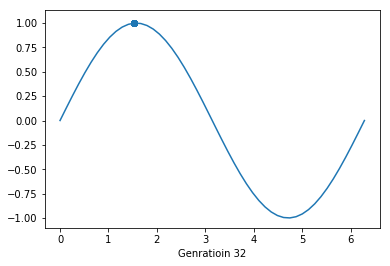

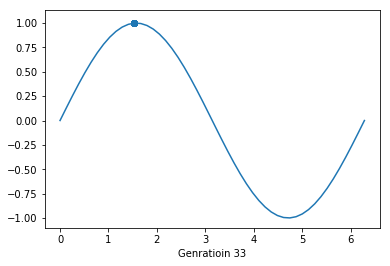

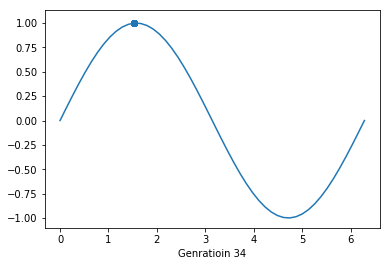

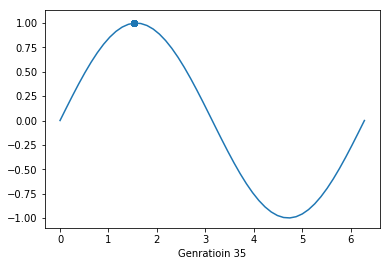

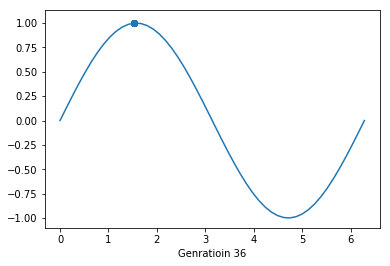

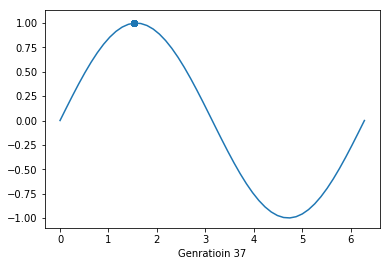

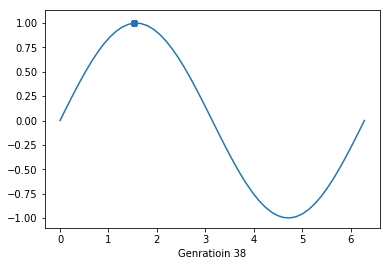

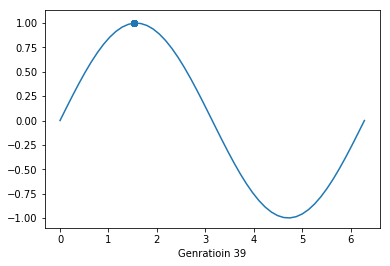

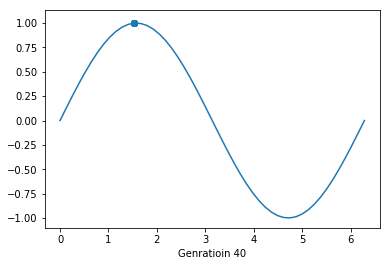

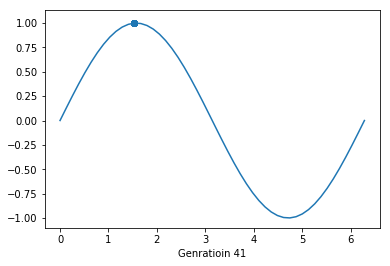

In [12]:
while 1:
    
    
    
    plot(A)
   # plt.savefig('min'+str(i)+'.png')
    global pre_best
    p=tornarment_selection(A)
    child=cross_over(A)
    
    type(child)
    mutation(child)
    my_list=my_list+child
    #sort by value
    my_list.sort(key = lambda t: t[1])

    my_list=my_list[40:]
    A=[my_list[i][0] for i in np.linspace(0,49,dtype=int)]
    A=np.array(A)
    A=A.reshape(1,50)
    
    best =my_list[49][1]
    if  math.fabs(best-pre_best)<0.00000000000000000000001 and  i>40:
        break;
    else:
   
        pre_best=best
    # Wait for 2 seconds
    plt.show()
    
    
    
 




